<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/admission_binary_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [19]:
import pandas as pd

In [21]:
dataset = pd.read_csv('/content/vw_emergency_episode_10000_less_fields.csv')  

In [22]:
dataset.head()

,establishment_code,sequence_number,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,departure_status,...,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,department_of_veteran_affairs_card_colour,remoteness_area_2011,remoteness_area_2016,emergency_department_information_system_covid19_flag
0,642,1101101952,1,9,6,9,NaN,NaN,3,9,...,0,0,0,0,NaN,38,9,NaN,NaN,0
1,208,1101101951,2,9,6,9,NaN,NaN,2,9,...,0,0,0,0,NaN,66,9,NaN,NaN,0
2,105,1101101950,1,9,6,9,NaN,NaN,2,9,...,0,0,0,0,NaN,33,9,NaN,NaN,0
3,106,1101101949,1,9,6,9,NaN,NaN,4,9,...,0,0,0,0,NaN,32,9,NaN,NaN,0
4,208,1101101948,1,9,6,9,NaN,NaN,3,9,...,0,0,0,0,NaN,24,9,NaN,NaN,0


In [23]:
dataset.shape

(10000, 70)

In [24]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9500, 70)
Unseen Data For Predictions: (500, 70)


In [25]:
from pycaret.classification import *

In [26]:
admission_test = setup(data = data, target = 'admission', session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9500, 70)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,63
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:42:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Quadratic Discriminant Analysis


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9995,0.9995,0.9994,0.9989,0.9992,0.9989,0.9989,0.451
ridge,Ridge Classifier,0.9983,0.0000,0.9994,0.9945,0.9970,0.9958,0.9958,2.262
rf,Random Forest Classifier,0.9977,1.0000,0.9978,0.9940,0.9959,0.9943,0.9943,3.018
lr,Logistic Regression,0.7284,0.5039,0.0000,0.0000,0.0000,0.0000,0.0000,1.425
svm,SVM - Linear Kernel,0.7284,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.622
knn,K Neighbors Classifier,0.7154,0.6576,0.2603,0.4576,0.3315,0.1680,0.1789,5.237
nb,Naive Bayes,0.2903,0.4863,0.9729,0.2734,0.4268,0.0048,0.0216,0.388


In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [16]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0


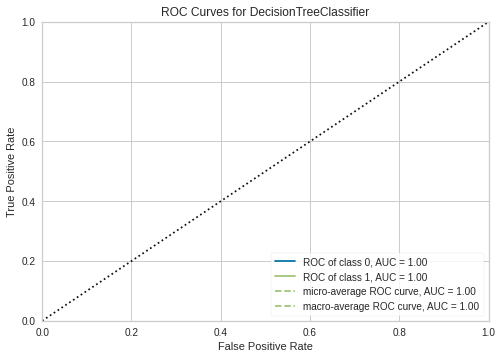

In [17]:
plot_model(tuned_dt, plot = 'auc')

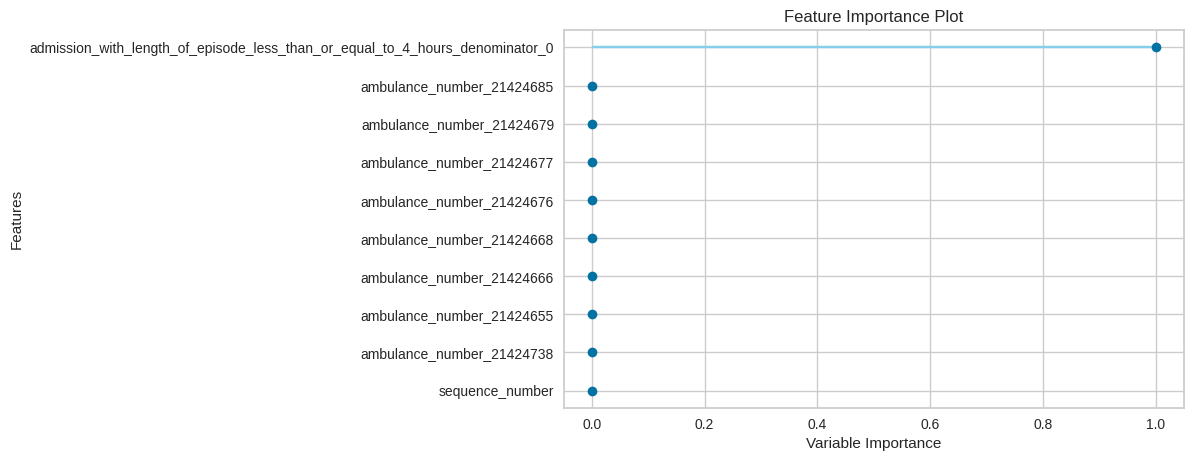

In [18]:
plot_model(tuned_dt, plot='feature')